In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

In [6]:
df=pd.read_csv('supermarket_sales .csv')

In [7]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [19]:
df.tail()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,year,month,day
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,2019-01-29,13:46:00,Ewallet,40.35,4.761905,2.02,6.2,2019,1,29
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,2019-03-02,17:16:00,Ewallet,973.80,4.761905,48.69,4.4,2019,3,2
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2019-02-09,13:22:00,Cash,31.84,4.761905,1.59,7.7,2019,2,9
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2019-02-22,15:33:00,Cash,65.82,4.761905,3.29,4.1,2019,2,22
999,849-09-3807,A,Yangon,Member,Female,Fashion accessories,88.34,7,30.9190,649.2990,2019-02-18,13:28:00,Cash,618.38,4.761905,30.92,6.6,2019,2,18


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   object        
 12  Payment                  1000 non-n

In [10]:
df['Date']=pd.to_datetime(df['Date'])

In [12]:
df['Time']=pd.to_datetime(df['Time']).dt.time

C:\Users\ahmed\AppData\Local\Temp\ipykernel_28560\3143423362.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time']=pd.to_datetime(df['Time']).dt.time


In [17]:
df['gross income'] = df['gross income'].round(2)

In [18]:
df['year']=df['Date'].dt.year
df['month']=df['Date'].dt.month
df['day']=df['Date'].dt.day

In [20]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
year                       0
month                      0
day                        0
dtype: int64

In [21]:
# Afficher les doublons dans le DataFrame
df[df.duplicated()]

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,year,month,day


In [23]:
df.duplicated().sum()

np.int64(0)

In [22]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,Date,cogs,gross margin percentage,gross income,Rating,year,month,day
count,1000.000000,1000.000000,1000.000000,1000.000000,1000,1000.00000,1.000000e+03,1000.000000,1000.00000,1000.0,1000.000000,1000.000000
mean,55.672130,5.510000,15.379369,322.966749,2019-02-14 00:05:45.600000,307.58738,4.761905e+00,15.379510,6.97270,2019.0,1.993000,15.256000
min,10.080000,1.000000,0.508500,10.678500,2019-01-01 00:00:00,10.17000,4.761905e+00,0.510000,4.00000,2019.0,1.000000,1.000000
25%,32.875000,3.000000,5.924875,124.422375,2019-01-24 00:00:00,118.49750,4.761905e+00,5.927500,5.50000,2019.0,1.000000,8.000000
50%,55.230000,5.000000,12.088000,253.848000,2019-02-13 00:00:00,241.76000,4.761905e+00,12.090000,7.00000,2019.0,2.000000,15.000000
75%,77.935000,8.000000,22.445250,471.350250,2019-03-08 00:00:00,448.90500,4.761905e+00,22.445000,8.50000,2019.0,3.000000,23.000000
max,99.960000,10.000000,49.650000,1042.650000,2019-03-30 00:00:00,993.00000,4.761905e+00,49.650000,10.00000,2019.0,3.000000,31.000000
std,26.494628,2.923431,11.708825,245.885335,NaN,234.17651,6.131498e-14,11.708842,1.71858,0.0,0.835254,8.693563


In [ ]:
df.groupby('City')['Total'].agg(['mean','sum']).round(3)

,mean,sum
City,,
Mandalay,319.873,106197.672
Naypyitaw,337.100,110568.706
Yangon,312.354,106200.370


In [41]:
df.groupby('City')['Total'].agg(['mean','sum'])

,mean,sum
City,,
Mandalay,319.872506,106197.6720
Naypyitaw,337.099715,110568.7065
Yangon,312.354031,106200.3705


In [49]:
city_sales=df.groupby('City')['Total'].sum().sort_values(ascending=False)

In [29]:
df.groupby("Customer type")["Total"].agg(['mean','sum']).round(3)

,mean,sum
Customer type,,
Member,327.791,164223.444
Normal,318.123,158743.305


In [30]:
df.groupby("Product line")["Total"].sum().sort_values(ascending=False)

Product line
Food and beverages        56144.8440
Sports and travel         55122.8265
Electronic accessories    54337.5315
Fashion accessories       54305.8950
Home and lifestyle        53861.9130
Health and beauty         49193.7390
Name: Total, dtype: float64

In [54]:
product_sales=df.groupby('Product line')['Total'].sum().sort_values(ascending=False)

In [31]:
df.groupby("month")["Total"].sum().sort_values(ascending=False)

month
1    116291.868
3    109455.507
2     97219.374
Name: Total, dtype: float64

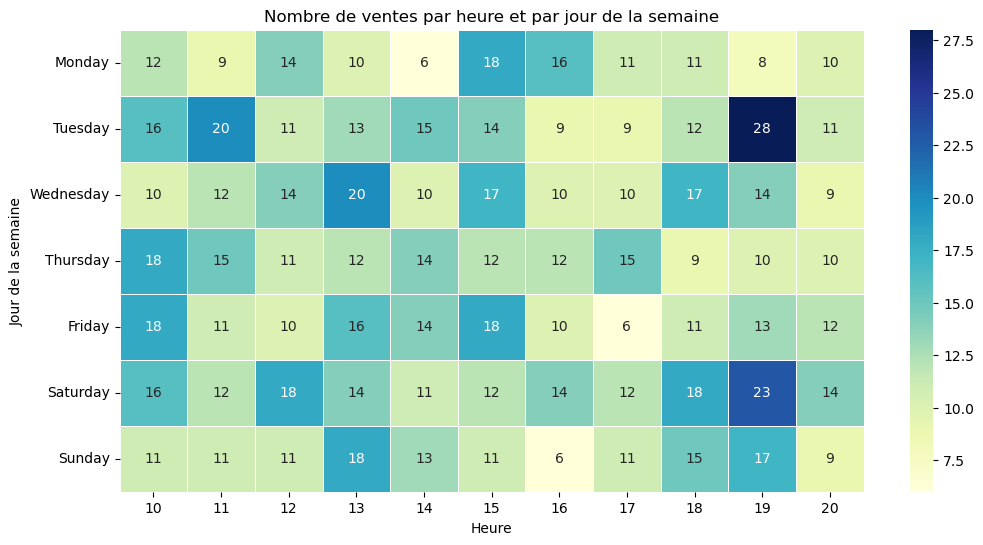

In [ ]:
# Extraire l'heure à partir de la colonne 'Time'

df['hour'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.hour

# Créer une table de fréquence des ventes par heure et par jour de la semaine
df['weekday'] = df['Date'].dt.day_name()
hourly_counts = df.groupby(['weekday', 'hour']).size().unstack(fill_value=0)

# Réordonner les jours de la semaine
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
hourly_counts = hourly_counts.reindex(ordered_days)

# Afficher la heatmap
plt.figure(figsize=(12,6))
sns.heatmap(hourly_counts, cmap='YlGnBu', linewidths=.5, annot=True, fmt='d')
plt.title('Nombre de ventes par heure et par jour de la semaine')
plt.xlabel('Heure')
plt.ylabel('Jour de la semaine')
plt.show()

In [33]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,...,Payment,cogs,gross margin percentage,gross income,Rating,year,month,day,hour,weekday
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,...,Ewallet,522.83,4.761905,26.14,9.1,2019,1,5,13,Saturday
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,...,Cash,76.40,4.761905,3.82,9.6,2019,3,8,10,Friday
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,...,Credit card,324.31,4.761905,16.22,7.4,2019,3,3,13,Sunday
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,...,Ewallet,465.76,4.761905,23.29,8.4,2019,1,27,20,Sunday
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,...,Ewallet,604.17,4.761905,30.21,5.3,2019,2,8,10,Friday


In [ ]:
df['Total'].sum().

np.float64(322966.749)

# 5. KPIs

In [36]:
total_revenue = df["Total"].sum()


print(f"Total Revenue: ${total_revenue:.2f}")




Total Revenue: $322966.75


In [37]:
num_transactions = df["Invoice ID"].nunique()
print(f"Number of Transactions: {num_transactions}")

Number of Transactions: 1000


In [38]:
avg_basket = total_revenue / num_transactions
print(f"Average Basket Size: ${avg_basket:.2f}")

Average Basket Size: $322.97


In [39]:
gross_income = df["gross income"].sum()
print(f"Gross Income: ${gross_income:.2f}")

Gross Income: $15379.51


# CA par ville

C:\Users\ahmed\AppData\Local\Temp\ipykernel_28560\1190601619.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot( x=city_sales.index, y=city_sales.values,palette='viridis')


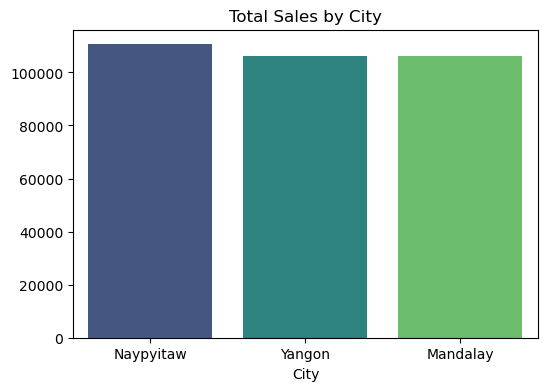

In [52]:
plt.figure(figsize=(6,4))
sns.barplot( x=city_sales.index, y=city_sales.values,palette='viridis')
plt.title('Total Sales by City')
plt.show()

# CA par ligne de produit

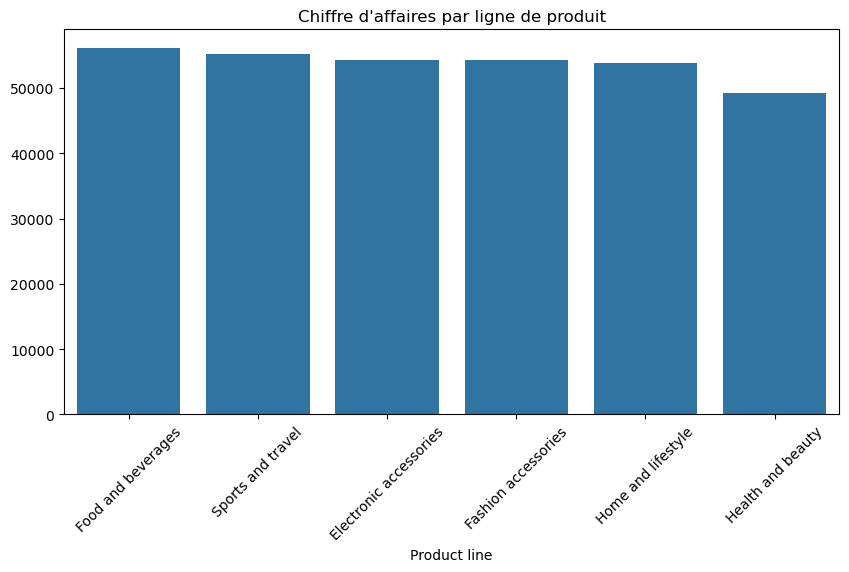

In [55]:
plt.figure(figsize=(10,5))
sns.barplot(x=product_sales.index, y=product_sales.values)
plt.title("Chiffre d'affaires par ligne de produit")
plt.xticks(rotation=45)
plt.show()


# Evolution des ventes par date

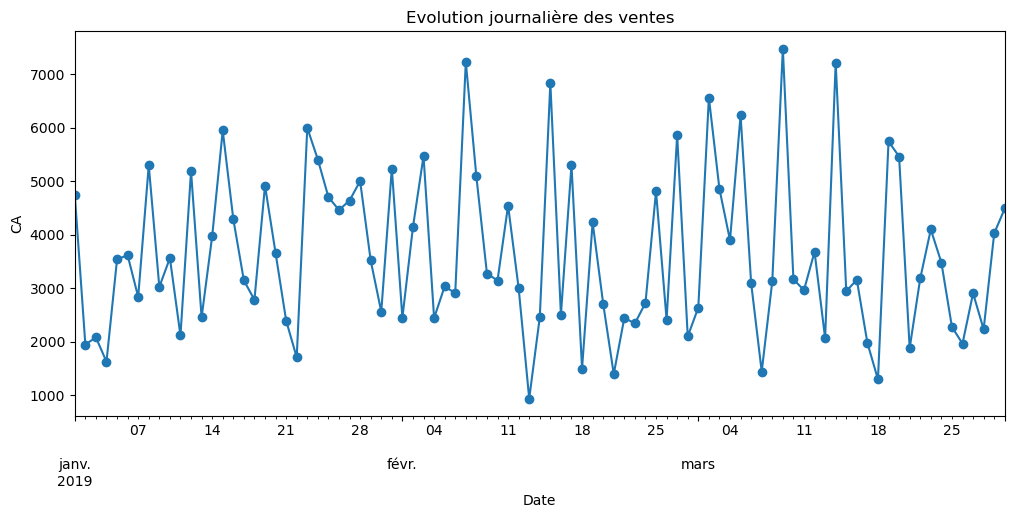

In [56]:
daily_sales = df.groupby("Date")["Total"].sum()
plt.figure(figsize=(12,5))
daily_sales.plot(kind="line", marker="o")
plt.title("Evolution journalière des ventes")
plt.xlabel("Date")
plt.ylabel("CA")
plt.show()